In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- count 방식으로 하면 단어하나하나만 그러나 단어
와 단어가 합치면 의미가 소실 , ngram으로 단어 합쳐서 보완

- 문장은 단어가 10개이상이니 한계가 있다. 
- 단어가 쓰일수 있는 의미를 연구하다 보니까 의미를 학습시키는 임베딩방식을 줌 ...
- 칼럼을 우리가 임의로 줌  사전에 학습된 glove 어제 씀 .. word to vect도 사전에 학습된 것 
- rnn 전전 단계 가져오지만 시간이 지날 수록 소실이 됨.. 그것을 보완하기위해서 lstm이 나왔다. 
-LSTM 이동상태를 추가해서 캐리어 같은 거만들어서 필요할때마다 뽑아서 쓴다. 

# LSTM
- SimpleRNN은 긴 시간에 걸친 의존성은 학습할 수 없다. 그래디언트 소실 문제가 발생하기 때문이다. 
- 이동 상태 c_t를 추가하여 rnn의 단점을 보완
- 컨베이션벨트에 내용 그전까지 꺼 떨굼
- LSTM은 정보를 여러 타임스텝에 걸쳐 나르는 방법을 추가하여 시퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위에 올라가 필요한 시점의 타임스탭으로 이동하여 떨군다.
- 개념적으로 데티터를 실어 나르는 이 흐림이 다음 출력과 상태를 조절한다. 

<img src = https://velog.io/@andy230/LSTM-%EC%8B%9C%EA%B0%81%EC%A0%81%EC%9C%BC%EB%A1%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0 >


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM

from keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어 숫자
max_length = 20  # 텍스트 단어 갯수 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(x_train)
print(x_train.shape) # 25000개의 리스트가 있음 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= max_length)  # 20개의 정수 tensor로 cut또는 padding 패딩한 부분은 0으로 채워지나요- 대부분 20개 넘지만 , 20자 안넘는 것은 0으로 채움 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen= max_length)  # 20개의 정수 tensor로 cut또는 padding

x_train.shape

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

(25000, 20)

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32)) # 굳이 32아니여도 된다. 64도된다. 
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train,y_train, epochs= 10, batch_size = 128, validation_split = 0.2)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 3s 10ms/step - loss: 0.5812 - acc: 0.6891 - val_loss: 0.5114 - val_acc: 0.7450
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 0.4412 - acc: 0.7937 - val_loss: 0.4999 - val_acc: 0.7520
Epoch 3/10
157/157 [===========================

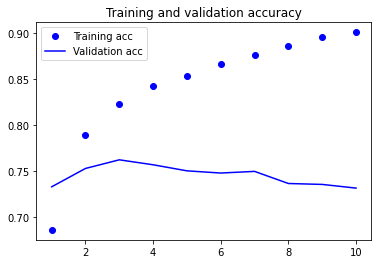

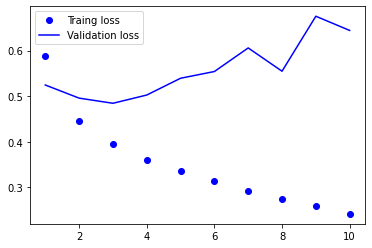

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc =history.history["val_acc"]
loss =history.history["loss"]
val_loss =history.history["val_loss"]

epochs= range(1,len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

# 영화 감성분석은 좀 단순하다. 이럴 때는 LSTM이 적당하지 않을 수도 있다. 

- 임베딩 차원이나 LSTM의 출력 차원 같은 하이퍼 파라미터를 튜닝 및 규제를 통하여 성능 개선 필요 
- LSTM은 감성 분석과 같은 문제 보다는 훨씬 더 복잡한 자연어 처리 문제들 특히 질의-응답, 기계번역 분약에서 뛰어난 능력을 발휘
- conv는 이미지 처리 rnn은 자연어처리에서 주로 쓴다. 
- conv1d는 시퀀스 데이터에서 쓸 수 있다. 

# Conv1D (1DConvnet)

#### 1D 컨브넷
- Conv1D 층을 사용하여 구현, Conv2D와 인터페이스가 비슷함 , (samples, time, features) 크기의 3D 텐서를 입력받고,
비슷한 형태의 3D 텐서를 반환 
- 합성곱 윈도우는 시간 축의 1D 윈도우이며 입력텐서의 두번째 축임
- 1D는 i work at google을 순서대로 윈도우로 1D 묶음 순서가 반영됨 

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features =10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), len(x_test))

25000 25000


In [ ]:
x_train =sequence.pad_sequences(x_train, maxlen =max_len)
x_test =sequence.pad_sequences(x_test, maxlen =max_len)
print(x_train.shape, x_test.shape)

(25000, 500) (25000, 500)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len)) # 128은 순서대로 maxlen은 리스트에서 500단어까지만 쓰겠다.
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())# Flatten 대신에
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
from keras.metrics.metrics import binary_crossentropy
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss=binary_crossentropy,
              metrics=['acc'])

history =model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split =0.2)

Epoch 1/10
157/157 [==============================] - 7s 12ms/step - loss: 0.9585 - acc: 0.4992 - val_loss: 0.6893 - val_acc: 0.5454
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6779 - acc: 0.6122 - val_loss: 0.6743 - val_acc: 0.5872
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6451 - acc: 0.7129 - val_loss: 0.6413 - val_acc: 0.6554
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5814 - acc: 0.7738 - val_loss: 0.5501 - val_acc: 0.7772
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4671 - acc: 0.8286 - val_loss: 0.4416 - val_acc: 0.8306
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3775 - acc: 0.8601 - val_loss: 0.4019 - val_acc: 0.8504
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3299 - acc: 0.8840 - val_loss: 0.3914 - val_acc: 0.8618
Epoch 8/10
157/157 [==============================] - 2s 10ms/step - 

- 검증 정확도는 LSTM(0.88?)보다 조금 낮지만 
CPU, GPU에서 더 빠르게 실행되므 이는 단어 수준의 감성분류 작업에 순환네트워크 대신하여 빠르고 경제적인 1D컨브넷을 사용할수 있음

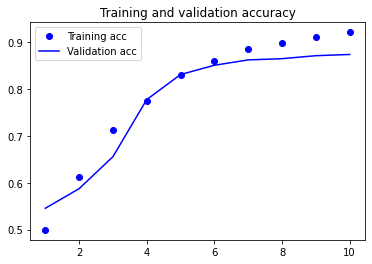

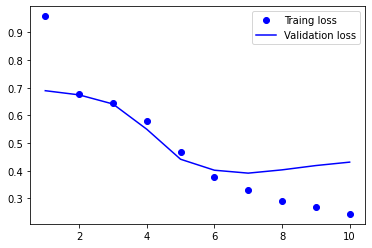

In [ ]:
acc =history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1) 

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

- 시간 개념이 있는 것은 shuffle 하면 안된다. 시간이 중요함

# 시계열_주식예측

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


df= pd.read_csv('/content/drive/MyDrive/TSLA.csv')
df.head()
# 날자 , 시작가(시가), 높은가, 낮은가, 종가, 수정된 종가, 거래량

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000


In [ ]:
df.shape

(1259, 7)

In [ ]:
df.iloc[:800, 1:2]

,Open
0,17.481333
1,17.483334
2,17.473333
3,17.782667
4,17.614668
...,...
795,19.003332
796,18.986668
797,17.340000
798,18.217333


In [ ]:
training_set = df.iloc[:800, 1:2].values # 시가만 array로 바꿈 
test_set =df.iloc[800:, 1:2].values

https://velog.io/@lazy_learner/LSTM-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%93%88-%EB%A7%8C%EB%93%A4%EA%B8%B0-1


https://velog.velcdn.com/images/lazy_learner/post/54a0060d-a049-4823-86e5-1c26371e876e/image.png

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))# 0에서 1로 스케일링
training_set_scaled =sc.fit_transform(training_set)

X_train =[]
y_train=[]

# time_step : 60, output : 1 

for i in range(60, 800): # 0-59는 첫번째 데이터 셋
  X_train.append(training_set_scaled[i-60:i,0]) # 0부터 60까지 , 0열 # 인덱스로보면 시작이고 끝이니까 끝은 제외 59까지
  y_train.append(training_set_scaled[i,0])  # 1개만..y값은 60번째 # 시작인덱스니까 하나니까 60딱 가지고 오고

X_train , y_train =np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [ ]:
print(y_train[1]) # 첫번째 y값 인덱스 61
X_train[2][-1] #  두번째 X_train 인덱스 1~61이니까 마지막 61

0.3997217416156186


array([0.39972174])

In [ ]:
model = Sequential()
model.add(LSTM(units =50, return_sequences=True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units =50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss=binary_crossentropy,
              metrics=['acc'])

In [ ]:
history =model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 4s 15ms/step - loss: 0.8013 - acc: 0.0014
Epoch 2/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6090 - acc: 0.0027
Epoch 3/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6037 - acc: 0.0027
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6035 - acc: 0.0027
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6016 - acc: 0.0027
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.6048 - acc: 0.0027
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6000 - acc: 0.0027
Epoch 8/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6016 - acc: 0.0027
Epoch 9/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6050 - acc: 0.0027
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.5987 - acc: 0.0027
Epoch 11/100
24/24 [=============================

# 테스트 데이터

In [ ]:
len(dataset_total)

1259

In [ ]:
len(dataset_test)

459

In [ ]:
len(dataset_total) - len(dataset_test) - 60

740

In [ ]:
len(df)

1259

In [ ]:
len(dataset_total) - len(dataset_test) - 60

740

In [ ]:
1259 -800

459

In [ ]:
519-60

459

In [ ]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train,dataset_test), axis=0) 
                           # 1259      -459 -60  =740 x_test는 740~800까지 테스트 트레인으로 잡겠다. 
                           # 740부터 테스트 데이터셋으로 잡겠다. 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values# df[760:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs) # mixmaxscaler 0과 1사이이다.  

X_test = []
for i in range(60, 519):# 800부터 1259의 데이터 사용하는데 459개의 데이터를 쓰는 건데 0부터가 아닌 60부터니까.
  X_test.append(inputs[i-60:i,0])


In [ ]:
X_test

[array([0.87195646, 0.91189591, 0.88275975, 0.89896468, 0.85616082,
        0.76850673, 0.79277331, 0.82939806, 0.84437529, 0.86348563,
        0.89106686, 0.77517702, 0.70155917, 0.66550724, 0.69431605,
        0.74575438, 0.7099071 , 0.73294598, 0.70900693, 0.69317017,
        0.681303  , 0.74755503, 0.71207599, 0.73212751, 0.65278065,
        0.66333835, 0.63191066, 0.66509806, 0.67491923, 0.62847325,
        0.6135369 , 0.63702577, 0.76163197, 0.84089694, 0.83128041,
        0.82465118, 0.92797815, 0.91349192, 0.86622746, 0.89540451,
        0.88443757, 0.81675336, 0.80856901, 0.7414168 , 0.6112862 ,
        0.68866882, 0.73065433, 0.72357486, 0.72995862, 0.71890993,
        0.72058763, 0.68727758, 0.65449936, 0.65343536, 0.63272907,
        0.58407326, 0.58305039, 0.48197407, 0.53582681, 0.56123903]),
 array([0.91189591, 0.88275975, 0.89896468, 0.85616082, 0.76850673,
        0.79277331, 0.82939806, 0.84437529, 0.86348563, 0.89106686,
        0.77517702, 0.70155917, 0.66550724, 0.

In [ ]:
X_test = np.array(X_test)
X_test

array([[0.87195646, 0.91189591, 0.88275975, ..., 0.48197407, 0.53582681,
        0.56123903],
       [0.91189591, 0.88275975, 0.89896468, ..., 0.53582681, 0.56123903,
        0.56930068],
       [0.88275975, 0.89896468, 0.85616082, ..., 0.56123903, 0.56930068,
        0.59622696],
       ...,
       [1.71776416, 1.83263101, 2.27789832, ..., 3.84940858, 4.41609038,
        4.64201812],
       [1.83263101, 2.27789832, 2.45398378, ..., 4.41609038, 4.64201812,
        5.16712389],
       [2.27789832, 2.45398378, 2.35143441, ..., 4.64201812, 5.16712389,
        5.16708264]])

In [ ]:
X_test.shape

(459, 60)

In [ ]:
2, 2, 3 # 맨뒤가 차원이다. 시퀀스데이터라 차원이 하나 더 들어감...?

In [ ]:
                #X_test데이터를 # 459        60               1
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

In [ ]:
print(X_test.shape) #459개의 데이터가 있고 그것은 60개의 행 1열의 값을 가진다. 

(459, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train ,epochs =100, batch_size=32)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_27 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_28 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_34 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 1)               

In [ ]:
inputs

In [ ]:
len(dataset_total)-len(dataset_test)-60

740

In [ ]:
len(dataset_test)

459

In [ ]:
len(dataset_total)

1259

In [ ]:
pd.concat((dataset_train, dataset_test),axis=0)

,Open
0,17.481333
1,17.483334
2,17.473333
3,17.782667
4,17.614668
...,...
1254,81.431999
1255,85.112663
1256,93.667336
1257,93.666664


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # y 값을 안만드니까 이렇게함 

15/15 [==============================] - 1s 6ms/step


# 시각화

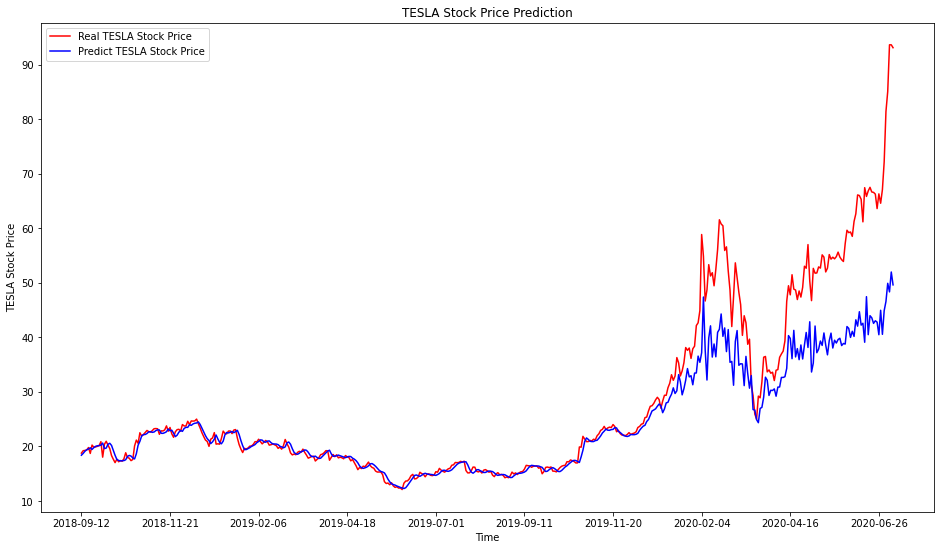

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df.loc[800:,'Date'], dataset_test.values, color='red', label='Real TESLA Stock Price')
plt.plot(df.loc[800:,'Date'], predicted_stock_price, color='blue', label='Predict TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# 시계열 기온 예측 

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-12-15 00:15:51--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.128.216, 52.216.186.165, 52.217.132.112, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.128.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  13.8MB/s    in 0.9s    

2022-12-15 00:15:53 (13.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
ls

drive/                      jena_climate_2009_2016.csv.zip  sample_data/
jena_climate_2009_2016.csv  __MACOSX/


In [4]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data =f.read()
    
lines = data.split("\n") # 띄어쓴거 대로 나눈다. 
header = lines[0].split(",") # , 별로 나눈다.  # header은 제목 
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [5]:
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [ ]:
lines[1:]

In [6]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]
temperature[:3] 

array([-8.02, -8.41, -8.51])

In [7]:
np.zeros((len(lines),))

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
np.zeros((len(lines), len(header) - 1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

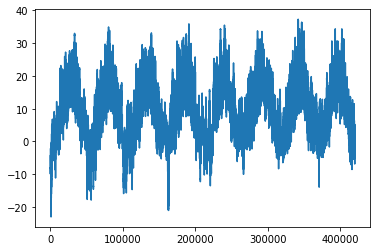

<Figure size 1152x648 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.figure(figsize=(16,9))
plt.show() 

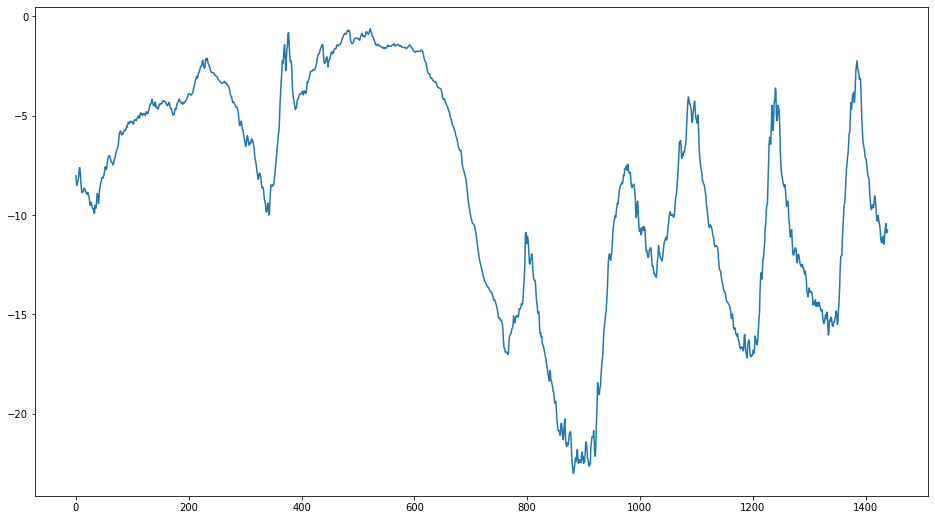

In [10]:
plt.figure(figsize=(16,9))
plt.plot(range(1440), temperature[:1440])
plt.show()

In [ ]:
len(raw_data)

420451

In [11]:
# 각 분할에 사용할 샘플 수 계산 

num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples) 

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [12]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std 

In [15]:
from tensorflow import keras
sampling_rate = 6 #1시간단위로 본다. 
sequence_length = 120 # 5일간 데이터  120시간 오늘치 측정하고 싶으면 그앞에 120개 
delay = sampling_rate * (sequence_length + 24 - 1) # 6 *(120 +24 -1) # 5일 23시간 6일째 본다.
batch_size = 256 # 120시간 짜리가 256개...

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay], # 5일 23시부터
    targets=temperature[delay:], # 목표인 6일부터
    sampling_rate=sampling_rate, # 1시간마다 기존은 10분?
    sequence_length=sequence_length, # 5일마다 잡음 
    shuffle=True, # 왜 섞었는지? 5일씩 묶여 있음.. 120개식 묶고 나머지는 섞인다. 
    batch_size=batch_size, # 배치마다 가중치가 붙는데 이거는 5일마다 셔플이 돈다..?
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay], # 이러면 위의 train_dataset이랑 별차이가 없지 않나? 썩어서 별차이가 없다. 
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True, 
    batch_size=batch_size,
    start_index=num_train_samples, # start_index가 다르다. 210225
    end_index=num_train_samples + num_val_samples)# 210225+  105112

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay], 
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples) # 210225+  105112

In [16]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break # 256개 120행 14개 속성 
          # batch size 는 '개'

샘플 크기: (256, 120, 14)
타깃 크기: (256,)


In [21]:
samples[0]

<tf.Tensor: shape=(120, 14), dtype=float64, numpy=
array([[-0.72653918, -0.38147412, -0.32316711, ..., -0.88666226,
        -1.0333287 ,  0.33033629],
       [-0.81001842, -0.39287535, -0.32767893, ..., -1.03663735,
        -1.1194222 , -1.43494541],
       [-0.91701294, -0.40199634, -0.32767893, ..., -0.09766288,
        -0.55120513, -1.74257384],
       ...,
       [-2.7241621 , -0.2663217 , -0.05020208, ...,  3.8342927 ,
         3.56836866,  0.18007477],
       [-2.94520572, -0.16599088,  0.06823316, ...,  4.39506912,
         5.95746317,  0.33849002],
       [-2.92756926, -0.15801002,  0.07500089, ...,  3.72344155,
         3.98161744,  0.29772139]])>

In [ ]:
raw_data.shape

(420451, 14)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

                            #24*5 5일 단위  None으로하면 자동으로 할 수 있다. 단 속도가 차이/ # 속성개수
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1])) # 120, 14개 2차원이다. 
x = layers.Flatten()(inputs) # 왜 플레튼 부터 시키는지? 1차원으로 바꾸기 위해 summary에 none이 있는것이 앞에 none은 배치사이즈 (none, ~)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x) #시계열이니 결과가 1개나오고 그럴 실제와 비교하는 것이다. # 활성화함수 sigmoid는 분류이다. 회귀는 값을 예측하는 것니 결과가 그대로 나온다.
model = keras.Model(inputs, outputs) # 함수형 모델이다. input, output을 넣어서 완성시킨다. 

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 43s 51ms/step - loss: 12.2296 - mae: 2.7105 - val_loss: 12.4386 - val_mae: 2.7891
Epoch 2/10
819/819 [==============================] - 40s 48ms/step - loss: 9.0044 - mae: 2.3556 - val_loss: 10.4860 - val_mae: 2.5584
Epoch 3/10
819/819 [==============================] - 42s 51ms/step - loss: 8.2023 - mae: 2.2500 - val_loss: 10.8436 - val_mae: 2.6039
Epoch 4/10
819/819 [==============================] - 39s 48ms/step - loss: 7.7604 - mae: 2.1874 - val_loss: 13.4165 - val_mae: 2.9093
Epoch 5/10
819/819 [==============================] - 40s 48ms/step - loss: 7.4533 - mae: 2.1439 - val_loss: 12.4899 - val_mae: 2.7939
Epoch 6/10
819/819 [==============================] - 40s 48ms/step - loss: 7.2234 - mae: 2.1131 - val_loss: 11.1396 - val_mae: 2.6338
Epoch 7/10
819/819 [==============================] - 41s 50ms/step - loss: 7.0052 - mae: 2.0810 - val_loss: 10.8525 - val_mae: 2.6044
Epoch 8/10
819/819 [==============================] - 

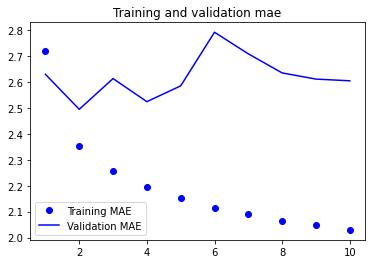

In [ ]:
mae =history.history['mae']
mae_loss =history.history['val_mae']


epochs = range(1, len(loss)+1) 

plt.plot(epochs, mae, 'bo', label ='Training MAE')
plt.plot(epochs, mae_loss, 'b', label ='Validation MAE')
plt.title("Training and validation mae")
plt.legend()
plt.show()

In [ ]:
# 상식수준의 기준점 - 오늘과 내일 날씨 가 같다.
# 검증 MAE 2.44
# 테스트 MAE 2.62

In [ ]:
MAE 2.44 2.58 DNN - 위에 한거 DNN이다.
              CNN Conv2D 시계열을 처리 시계열에다가 1X3이 쭉 지나감 이유 시간은 2014 2015 이순이니까 1행 n열
    

# [과제]1D 합성곱 모델 시도 

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8,24, activation="relu")(inputs) 
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8,12, activation='relu')(x)
x = layers.MaxPooling(2)(x)

x = layers.GlobalAveragePooling1D()(x)
output = keras.Model(inputs, outputs)

callback =[ keras.callback.ModelCheckpoint]

In [ ]:
# 오래 걸린다. 

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
                 # 필터 , 커널 사이즈이다. #24시간을 본다는 개념  어차피 5일치를 봄 
x = layers.Conv1D(8, 24, activation="relu")(inputs) # 1D는 시계열 
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 44s 53ms/step - loss: 23.6057 - mae: 3.8019 - val_loss: 15.0059 - val_mae: 3.0441
Epoch 2/10
819/819 [==============================] - 41s 50ms/step - loss: 16.6059 - mae: 3.2361 - val_loss: 15.2630 - val_mae: 3.0822
Epoch 3/10
819/819 [==============================] - 41s 50ms/step - loss: 15.1541 - mae: 3.0930 - val_loss: 19.8310 - val_mae: 3.5420
Epoch 4/10
819/819 [==============================] - 41s 50ms/step - loss: 14.3199 - mae: 3.0022 - val_loss: 13.8500 - val_mae: 2.9511
Epoch 5/10
819/819 [==============================] - 63s 76ms/step - loss: 13.6980 - mae: 2.9359 - val_loss: 14.5113 - val_mae: 3.0271
Epoch 6/10
819/819 [==============================] - 46s 56ms/step - loss: 13.0831 - mae: 2.8690 - val_loss: 16.2852 - val_mae: 3.2065
Epoch 7/10
819/819 [==============================] - 46s 56ms/step - loss: 12.4559 - mae: 2.7962 - val_loss: 14.3258 - val_mae: 2.9863
Epoch 8/10
819/819 [============================

In [ ]:
model.evaluate(test_dataset)

405/405 [==============================] - 14s 35ms/step - loss: 15.2748 - mae: 3.1136


[15.274796485900879, 3.113609552383423]

# [과제] LSTM 기반 모델 시도

In [ ]:
# 오래걸린다. 

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x= layers.LSTM(16)(inputs) # 16은 아웃풋이다. 
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 


Epoch 1/10
819/819 [==============================] - 56s 66ms/step - loss: 38.6577 - mae: 4.5154 - val_loss: 12.1317 - val_mae: 2.6571
Epoch 2/10
819/819 [==============================] - 47s 57ms/step - loss: 10.8133 - mae: 2.5545 - val_loss: 9.7529 - val_mae: 2.4309
Epoch 3/10
819/819 [==============================] - 46s 56ms/step - loss: 9.6952 - mae: 2.4283 - val_loss: 9.8076 - val_mae: 2.4388
Epoch 4/10
819/819 [==============================] - 46s 56ms/step - loss: 9.1869 - mae: 2.3662 - val_loss: 9.6479 - val_mae: 2.4220
Epoch 5/10
819/819 [==============================] - 47s 57ms/step - loss: 8.8077 - mae: 2.3245 - val_loss: 9.8956 - val_mae: 2.4503
Epoch 6/10
819/819 [==============================] - 51s 62ms/step - loss: 8.5598 - mae: 2.2934 - val_loss: 10.3314 - val_mae: 2.4985
Epoch 7/10
819/819 [==============================] - 47s 57ms/step - loss: 8.3585 - mae: 2.2668 - val_loss: 10.2837 - val_mae: 2.4968
Epoch 8/10
819/819 [==============================] - 46s


# [과제] RNN 기반 모델 시도(스태킹)

In [ ]:
# 오래 걸린다. 

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x= layers.SimpleRNN(16)(inputs, return_sequences= True) # 16은 아웃풋이다. 
x= layers.SimpleRNN(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 124s 151ms/step - loss: 49.1430 - mae: 5.1155 - val_loss: 13.7384 - val_mae: 2.7528
Epoch 2/10
819/819 [==============================] - 108s 132ms/step - loss: 11.4903 - mae: 2.6234 - val_loss: 10.4128 - val_mae: 2.4510
Epoch 3/10
819/819 [==============================] - 102s 125ms/step - loss: 10.4814 - mae: 2.5248 - val_loss: 9.7592 - val_mae: 2.4052
Epoch 4/10
819/819 [==============================] - 115s 140ms/step - loss: 10.2944 - mae: 2.5031 - val_loss: 9.6985 - val_mae: 2.3957
Epoch 5/10
819/819 [==============================] - 110s 135ms/step - loss: 10.1975 - mae: 2.4913 - val_loss: 9.5126 - val_mae: 2.3782
Epoch 6/10
819/819 [==============================] - 104s 127ms/step - loss: 10.1357 - mae: 2.4827 - val_loss: 9.4029 - val_mae: 2.3709
Epoch 7/10
819/819 [==============================] - 106s 129ms/step - loss: 10.0585 - mae: 2.4728 - val_loss: 8.9759 - val_mae: 2.3302
Epoch 8/10
819/819 [===================

# [과제] 드롭아웃 규제를 적용한 LSTM 모델을 훈련하고 평가

In [ ]:
# 오래 걸린다. 

In [23]:
from keras import layers
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x= layers.LSTM(16)(inputs) # 16은 아웃풋이다. 
x= layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 56s 59ms/step - loss: 48.3678 - mae: 5.1613 - val_loss: 13.6299 - val_mae: 2.7914
Epoch 2/10
819/819 [==============================] - 44s 54ms/step - loss: 19.7833 - mae: 3.4242 - val_loss: 10.4124 - val_mae: 2.5074
Epoch 3/10
819/819 [==============================] - 44s 54ms/step - loss: 18.2144 - mae: 3.2845 - val_loss: 10.0016 - val_mae: 2.4546
Epoch 4/10
819/819 [==============================] - 44s 53ms/step - loss: 17.3070 - mae: 3.2032 - val_loss: 9.2190 - val_mae: 2.3616
Epoch 5/10
819/819 [==============================] - 44s 53ms/step - loss: 16.7214 - mae: 3.1461 - val_loss: 9.4844 - val_mae: 2.3974
Epoch 6/10
819/819 [==============================] - 43s 53ms/step - loss: 16.2498 - mae: 3.1014 - val_loss: 9.1981 - val_mae: 2.3666
Epoch 7/10
819/819 [==============================] - 43s 53ms/step - loss: 15.6448 - mae: 3.0444 - val_loss: 9.3442 - val_mae: 2.3894
Epoch 8/10
819/819 [==============================] 

# [과제] 드롭아웃 규제와 스태킹을 적용하여 GRU 모델을 훈련하고 평가

In [ ]:
# 오래 걸린다. GRU모델은 LSTM을 개선한 모델이다. LSTM보다 파라미터가 더욱 적어 연산 비용도 적고 모델도 간단해 학습 속도가 
# 더 빠르지만 비슷한 성능을 내는 모델이다. 

In [ ]:
inputs =keras.Input(shape=(sequence_length, raw_data.shape))
x= layers.GRU(32, recurrent_dropout)

In [24]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs =layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/5
149/819 [====>.........................] - ETA: 9:12 - loss: 50.2514 - mae: 5.3937

KeyboardInterrupt: ignored